**Author: Md Khaled Hasan**

**Topic: Handwritten Digit Recognizer**

**Email: khaled.kuece15@gmail.com**


# Hello World of Deep Learning (Hand Written Digit Recognition using MNIST dataset)
We are going to use MNIST dataset for classifying handwritten digits. MNIST dataset is considered the 'Hello World' of deep learning. We have grayscale images of handwritten digits which are of 28×28 pixels. We have to classify them into 10 categories belonging from 0 to 9.

In [3]:
from keras.datasets import mnist

In the MNIST dataset, there are training and testing images with labels on them. Training images will be used as an input to the neural network and testing set will be used to measure the accuracy of the model. We are going to load the images to **train_images** and their corrsesponding values to **train_labels**. Here the labels specifies what digit is written on a given image.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's see the shape of the imgaes.

In [5]:
train_images.shape

(60000, 28, 28)

Here we can see that, we have 60000 images and every image is 28×28 pixels, means each images has a height of 28 pixels and width of 28 pixels. As we can see this is a 3D tensor(tensor is another way of saying multidimensional arrays) and the image shape is 2D. But neurons in the neural network recieves 1D values. Let's flatten or reshape the images. Flatten means making the 2D image to 1D vector.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))

If we look at the shape again, we can see this as a tuple of (60000,784). Here the 2D image were converted into 1D vector of 28×28=784 shape.

In [8]:
train_images.shape

(60000, 784)

Let;s look at test images also.

In [9]:
test_images.shape

(10000, 28, 28)

We can see test images are also 2D. Let's make it 1D.

In [10]:
test_images = test_images.reshape((10000, 28 * 28))
test_images.shape

(10000, 784)

Let's look at the data type

In [11]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

We can see datatype is uint8 (unsigned integer(0-255) 2⁸) which is discrete. The whole math for neural network is continuous not discrete. This is best approximated by floating point numbers. For compatibility, let's convert the the images to float32 and scale them between 0 and 1. Scaling increases accuracy.

In [12]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Let's convert the labels in categorical.

In [13]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Let's creat a neural network with two layer only.

In [14]:
from keras import models
from keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Here, **Sequential** means we are having a linear stack of layers. 

**Dense** means we are having densly connected neurons which means we are connecting every input to every other nueron or with more than one layer case, every neuron to other neuron. 

We are defining 1D vector of the images (784,). It will tell the model what to expect as an input. 
For clarification,
  - 0D tensors shape = ()
  - 1D tensors shape = (m,)
  - 2D tensors shape = (m,n)
  - 3D tensors shape = (x,m,n)

From first layer, we are having 512 output and we used relu as an activation function. Relu(z) = max(0,x) is just a function which returns zero for any negative input and the value itself if given any positive value. ReLU is the most popular activation function used in hidden layers.
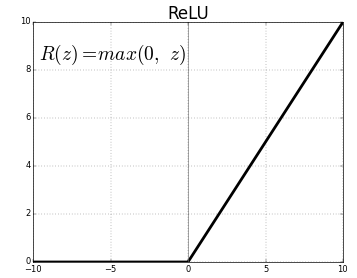

On the second layer, we are having 10 way layer means it will return 10 probability scores or 10 outputs. We used [softmax function](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer#:~:text=The%20softmax%20function%20is%20a,can%20be%20interpreted%20as%20probabilities.) as activation function.

**Why activation function?**

In any neuron, we perform a two step process. First, we train the model with linear weights and second build a linear fit. But all the probelms in the world can not be solved with linear fit. For complex problems we need non-linear functions to fit the model. Activation functions receives output from step 1 and fit the model with non-linear functions like relu, sfotmax, leakyrelu,sigmoid, tanh functions etc.


We always need to compile a model after bulding it.

In [16]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Here,
 - **loss function** will be able to measure its performance on the training data and veer itself in the right way. [All the Loss functions](https://keras.io/api/losses/)
 - **optimizer** way to update the netowrk based on loss. Heart of the neural network.[All the optimizers](https://keras.io/api/optimizers/)
 - **metrics**, we only cared about accuracy. Fraction of the images that will be correclty classified. [All the metrics](https://keras.io/api/metrics/)

Let's train the model.

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2558 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1040 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0685 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9883


Here, epoch means how many times we want the itirations. DL models do not process entire dataset hence breaks them into small batches and operate.

Let's see how much accuracy we obtanied.

In [18]:
 test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9793
test_acc: 0.9793000221252441


An accuracy of around 98%. Ways to further improve the accuracy.
 - Try different optimizers to reach the global minima loss with different step size
 - Try different loss functions like MAE(Mean Absolute Error), MSA(Mean Squared Error) etc.
 - Try different activation functions
 - Try different epochs and batch size
 - Try functional API instead of Sequntial Class
 - Try different Datasets